In [4]:
# 📘 Cell 1: Install required packages
# Reasoning: Ensures all necessary libraries are available for running the notebook smoothly.
!python -m pip install --upgrade pip

!pip install pandas numpy matplotlib seaborn --quiet


  Using cached pip-25.2-py3-none-any.whl.metadata (4.7 kB)
Using cached pip-25.2-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 25.1.1
    Uninstalling pip-25.1.1:
      Successfully uninstalled pip-25.1.1


In [5]:
# 📘 Cell 2: Import necessary libraries
# Reasoning: These are standard libraries for data loading, cleaning, and visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style and inline plotting
%matplotlib inline
sns.set(style="whitegrid")


In [7]:
# 📘 Cell 3: Load the dataset
# Reasoning: Load your CSV file from 'data/data.csv' into a pandas DataFrame and inspect its basic structure.
DATA_PATH = "data/dataset.csv"  # path to your dataset file

df = pd.read_csv(DATA_PATH)
print("✅ Dataset loaded successfully!")
print("Shape of dataset:", df.shape)  # number of rows and columns
df.head()  # display first few rows


✅ Dataset loaded successfully!
Shape of dataset: (312, 12)


,title,brand,description,price,categories,images,manufacturer,package_dimensions,country_of_origin,material,color,uniq_id
0,"GOYMFK 1pc Free Standing Shoe Rack, Multi-laye...",GOYMFK,"multiple shoes, coats, hats, and other items E...",$24.99,"['Home & Kitchen', 'Storage & Organization', '...",['https://m.media-amazon.com/images/I/416WaLx1...,GOYMFK,"2.36""D x 7.87""W x 21.6""H",China,Metal,White,02593e81-5c09-5069-8516-b0b29f439ded
1,"subrtex Leather ding Room, Dining Chairs Set o...",subrtex,subrtex Dining chairs Set of 2,NaN,"['Home & Kitchen', 'Furniture', 'Dining Room F...",['https://m.media-amazon.com/images/I/31SejUEW...,Subrtex Houseware INC,"18.5""D x 16""W x 35""H",NaN,Sponge,Black,5938d217-b8c5-5d3e-b1cf-e28e340f292e
2,Plant Repotting Mat MUYETOL Waterproof Transpl...,MUYETOL,NaN,$5.98,"['Patio, Lawn & Garden', 'Outdoor Décor', 'Doo...",['https://m.media-amazon.com/images/I/41RgefVq...,MUYETOL,"26.8""L x 26.8""W",NaN,Polyethylene,Green,b2ede786-3f51-5a45-9a5b-bcf856958cd8
3,"Pickleball Doormat, Welcome Doormat Absorbent ...",VEWETOL,The decorative doormat features a subtle textu...,$13.99,"['Patio, Lawn & Garden', 'Outdoor Décor', 'Doo...",['https://m.media-amazon.com/images/I/61vz1Igl...,Contrence,"24""L x 16""W",NaN,Rubber,A5589,8fd9377b-cfa6-5f10-835c-6b8eca2816b5
4,JOIN IRON Foldable TV Trays for Eating Set of ...,JOIN IRON Store,Set of Four Folding Trays With Matching Storag...,$89.99,"['Home & Kitchen', 'Furniture', 'Game & Recrea...",['https://m.media-amazon.com/images/I/41p4d4VJ...,NaN,"18.9""D x 14.2""W x 26""H",NaN,Iron,Grey Set of 4,bdc9aa30-9439-50dc-8e89-213ea211d66a


In [8]:
# 📘 Cell 4: Basic information about the dataset
# Reasoning: Understand data types, non-null counts, and overall schema.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               312 non-null    object
 1   brand               312 non-null    object
 2   description         159 non-null    object
 3   price               215 non-null    object
 4   categories          312 non-null    object
 5   images              312 non-null    object
 6   manufacturer        205 non-null    object
 7   package_dimensions  306 non-null    object
 8   country_of_origin   125 non-null    object
 9   material            218 non-null    object
 10  color               265 non-null    object
 11  uniq_id             312 non-null    object
dtypes: object(12)
memory usage: 29.4+ KB


In [9]:
# 📘 Cell 5: Summary statistics of numerical columns
# Reasoning: Provides quick insights about mean, std deviation, min, max, and quartiles.
df.describe()


,title,brand,description,price,categories,images,manufacturer,package_dimensions,country_of_origin,material,color,uniq_id
count,312,312,159,215,312,312,205,306,125,218,265,312
unique,305,264,153,135,87,305,155,286,9,72,143,305
top,"GOYMFK 1pc Free Standing Shoe Rack, Multi-laye...",MoNiBloom Store,"multiple shoes, coats, hats, and other items E...",$24.99,"['Patio, Lawn & Garden', 'Outdoor Décor', 'Doo...",['https://m.media-amazon.com/images/I/416WaLx1...,No,"36""L x 24""W",China,Wood,Black,02593e81-5c09-5069-8516-b0b29f439ded
freq,2,5,2,9,22,2,32,5,98,32,45,2


In [10]:
# 📘 Cell 6: Check for missing values
# Reasoning: Identify columns that contain missing or null values.
missing_values = df.isnull().sum().sort_values(ascending=False)
print("Missing values per column:")
missing_values


Missing values per column:


country_of_origin     187
description           153
manufacturer          107
price                  97
material               94
color                  47
package_dimensions      6
brand                   0
title                   0
images                  0
categories              0
uniq_id                 0
dtype: int64

In [26]:
# 📘 Cell 7: Handle missing values
# Reasoning:
# - For numerical columns: replace missing values with median (less sensitive to outliers).
# - For categorical/text columns: replace missing with 'Unknown'.
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna('Unknown')

print("✅ Missing values handled successfully!")

✅ Missing values handled successfully!


In [19]:
# 📘 Cell 8: Check and remove duplicate records
# Reasoning: Duplicate rows can bias analysis; they are removed to keep data integrity.
duplicates = df.duplicated().sum()
print("Number of duplicate rows found:", duplicates)

if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print("✅ Duplicates removed.")
else:
    print("No duplicate rows found.")


Number of duplicate rows found: 0
No duplicate rows found.


In [20]:
# 📘 Cell 9: Categorical uniqueness check
# Reasoning: Shows how many unique values exist for each categorical column.
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"{col}: {df[col].nunique()} unique values")


title: 305 unique values
brand: 264 unique values
description: 154 unique values
price: 136 unique values
categories: 87 unique values
images: 305 unique values
manufacturer: 156 unique values
package_dimensions: 287 unique values
country_of_origin: 10 unique values
material: 73 unique values
color: 144 unique values
uniq_id: 305 unique values


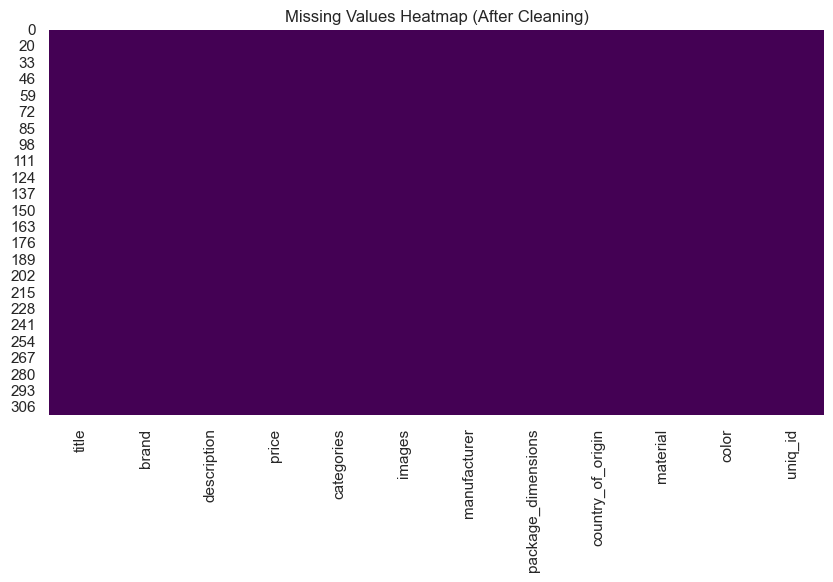

In [21]:
# 📘 Cell 10: Visualize missingness (optional)
# Reasoning: Visualize missing data patterns before and after cleaning.
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap (After Cleaning)")
plt.show()


In [22]:
# 📘 Cell 11: Numerical feature distribution
# Reasoning: Visualize how numeric columns are distributed (detect skewness, outliers).
numeric_cols = df.select_dtypes(include=['int64','float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


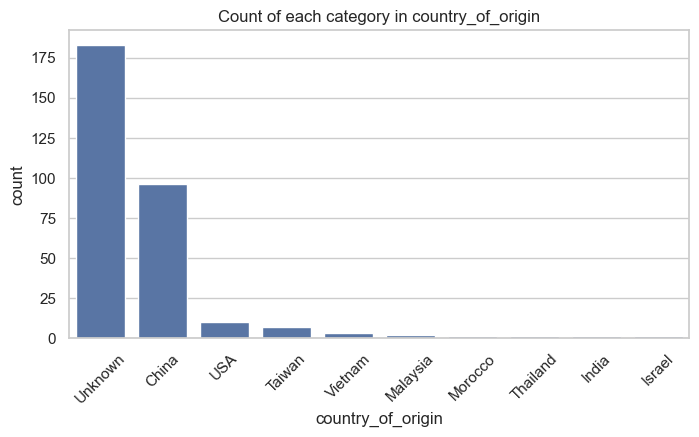

In [23]:
# 📘 Cell 12: Count plots for categorical columns
# Reasoning: Visualize frequency of values for each categorical column.
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    if df[col].nunique() < 20:  # only plot if not too many unique values
        plt.figure(figsize=(8,4))
        sns.countplot(data=df, x=col, order=df[col].value_counts().index)
        plt.title(f"Count of each category in {col}")
        plt.xticks(rotation=45)
        plt.show()


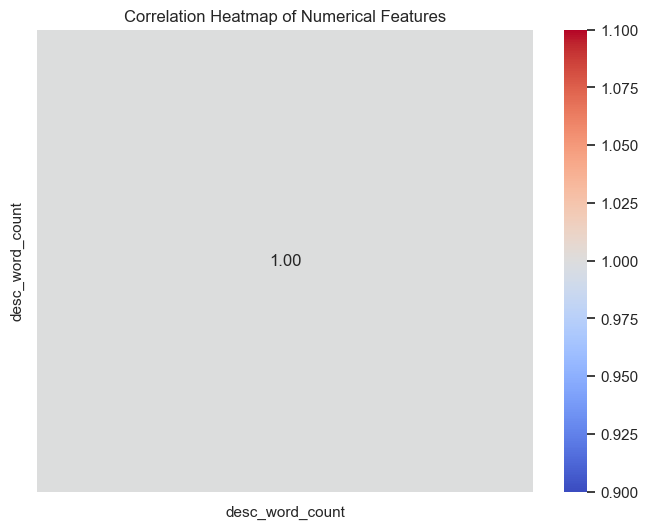

In [27]:
# 📘 Cell 13: Correlation heatmap
# Reasoning: Check relationships between numerical features to detect dependencies.
numeric_df = df.select_dtypes(include=['int64', 'float64'])

if not numeric_df.empty:
    plt.figure(figsize=(8,6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Correlation Heatmap of Numerical Features")
    plt.show()
else:
    print("No numerical columns found for correlation analysis.")

In [ ]:
# 📘 Cell 14: Example relationship (e.g., price vs category)
# Reasoning: Explore category-wise variation for numeric columns like 'price' (if available).
if 'price' in df.columns and 'category' in df.columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df, x='category', y='price')
    plt.title("Price Distribution by Category")
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
# 📘 Cell 15: Text data cleaning (optional)
# Reasoning: Clean textual columns (like 'description') for NLP tasks later.
import re

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+', '', text)  # remove URLs
    text = re.sub(r'[^a-z0-9\s]', '', text)  # remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()
    return text

if 'description' in df.columns:
    df['clean_description'] = df['description'].apply(clean_text)
    print("✅ Text column cleaned and saved as 'clean_description'.")


In [ ]:
# 📘 Cell 16: Feature engineering (optional)
# Reasoning: Create additional useful features like word count.
if 'description' in df.columns:
    df['desc_word_count'] = df['description'].apply(lambda x: len(str(x).split()))
    plt.figure(figsize=(6,4))
    sns.histplot(df['desc_word_count'], kde=True)
    plt.title("Distribution of Description Word Count")
    plt.show()


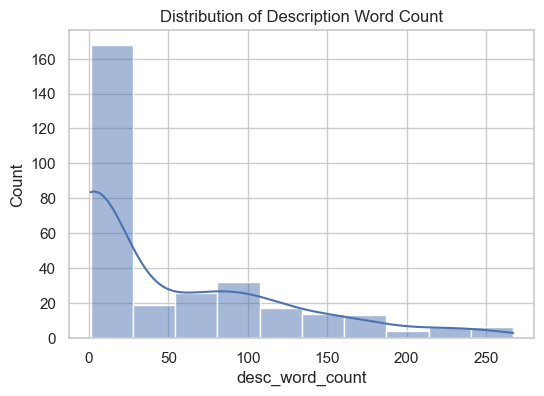

In [25]:
# 📘 Cell 16: Feature engineering (optional)
# Reasoning: Create additional useful features like word count.
if 'description' in df.columns:
    df['desc_word_count'] = df['description'].apply(lambda x: len(str(x).split()))
    plt.figure(figsize=(6,4))
    sns.histplot(df['desc_word_count'], kde=True)
    plt.title("Distribution of Description Word Count")
    plt.show()
